### Regression Models & Evaluation Techniques


In [1]:
# prepare environment
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
from sklearn.feature_selection import f_regression 
from math import sqrt
import matplotlib.pyplot as plt
from pydataset import data
%matplotlib inline


#### Sample Scenario

-My students have just completed the first exam in the spring semester literature class. I want to know if there is anyone I should be concerned about at this point so that we can get ahead of a problem before it forms.

-I have the data from last semester's class. Neither the content nor the exams have changed in any way, so I'm hoping I can use that data to find the line that most closely predicts final grades. Once I find the "Line of Best Fit" or the "Regression Line", I can use the equation to calculate the current students' final grades using their first exam grades.

-There are 3 questions we need to answer:

    How would we find that line?
    
    How do we evaluate our model, and how do we know if it's good enough?
    
    Are our features valuable?

In [2]:
# generate our student grade data
df = pd.DataFrame(np.array([[100, 96], [93, 90], [84, 89], [80, 85], [76, 80], [70, 68], [79, 75]]), 
                  columns = ['x', 'y'])

x = df['x']
y = df['y']

df.head(3)

,x,y
0,100,96
1,93,90
2,84,89


### Exercises


1. Load the tips dataset from either pydataset or seaborn.

In [3]:
tips = data("tips")

In [4]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 1 to 244
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null object
smoker        244 non-null object
day           244 non-null object
time          244 non-null object
size          244 non-null int64
dtypes: float64(2), int64(1), object(4)
memory usage: 15.2+ KB


#### How do we find the Line of Best Fit?

This example is a univariate regression. We want to find the regression line where exam 1 is the feature or single independent variable and final grade is our target or dependent variable. We have a labeled dataset, so this is supervised machine learning. In short, we are going to provide a regression algorithm with our labeled data (our x and y values) and get in return the parameters needed for the optimal regression line. The parameters needed in a univariate problem is..

    -the y-intercept and 

    -the slope/coefficient

2. Fit a linear regression model (ordinary least squares) and compute yhat, predictions of tip using total_bill. You may follow these steps to do that:

    -import the method from statsmodels: from statsmodels.formula.api import ols

    -fit the model to your data, where x = total_bill and y = tip: regr = ols('y ~ x', data=df).fit()

    -compute yhat, the predictions of tip using total_bill: df['yhat'] = regr.predict(df.x)

Create a file evaluate.py that contains the following functions.

In [6]:
# assign x and y variables
x = tips["total_bill"]
y = tips["tip"]

# fit model to data
regr = ols("y ~ x", data=tips).fit()
regr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     203.4
Date:                Mon, 14 Oct 2019   Prob (F-statistic):           6.69e-34
Time:                        14:26:45   Log-Likelihood:                -350.54
No. Observations:                 244   AIC:                             705.1
Df Residuals:                     242   BIC:                             712.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9203      0.160      5.761      0.000       0.606       1.235
x              0.1050      0.007     14.260      0.000       0.091       0.120
==============================================================================
Omnibus:                       20.185   Durbin-Watson:                   2.151
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.750
Skew:                           0.443   Prob(JB):                     6.35e-09
Kurtosis:                       4.711   Cond. No.                         53.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [7]:
# compute yhat, the predictions of tip using total_bill
tips["yhat"] = regr.predict(pd.DataFrame(x))
yhat = tips["yhat"]
yhat.head()

1    2.704636
2    2.006223
3    3.126835
4    3.407250
5    3.502822
Name: yhat, dtype: float64

In [8]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size,yhat
1,16.99,1.01,Female,No,Sun,Dinner,2,2.704636
2,10.34,1.66,Male,No,Sun,Dinner,3,2.006223
3,21.01,3.50,Male,No,Sun,Dinner,3,3.126835
4,23.68,3.31,Male,No,Sun,Dinner,2,3.407250
5,24.59,3.61,Female,No,Sun,Dinner,4,3.502822


In [9]:
df = tips.drop(columns=["sex", "smoker", "day", "time", "size"])
df.head()

,total_bill,tip,yhat
1,16.99,1.01,2.704636
2,10.34,1.66,2.006223
3,21.01,3.50,3.126835
4,23.68,3.31,3.407250
5,24.59,3.61,3.502822


#### You can calculate residual metrics for model by hand...

In [10]:
df["residual"] = df["yhat"] - df["tip"]
df.head()

,total_bill,tip,yhat,residual
1,16.99,1.01,2.704636,1.694636
2,10.34,1.66,2.006223,0.346223
3,21.01,3.50,3.126835,-0.373165
4,23.68,3.31,3.407250,0.097250
5,24.59,3.61,3.502822,-0.107178


In [11]:
df["residual^2"] = df["residual"] ** 2
df.head()

,total_bill,tip,yhat,residual,residual^2
1,16.99,1.01,2.704636,1.694636,2.871792
2,10.34,1.66,2.006223,0.346223,0.119870
3,21.01,3.50,3.126835,-0.373165,0.139252
4,23.68,3.31,3.407250,0.097250,0.009458
5,24.59,3.61,3.502822,-0.107178,0.011487


In [12]:
sse = sum(df["residual^2"])
print(f"sse = {sse}")
mse = sse / len(df)
print(f"mse = {mse}")
rmse = sqrt(mse)
print(f"rmse = {rmse}")

sse = 252.78874385077603
mse = 1.036019442011377
rmse = 1.0178504025697377


In [13]:
df_eval = pd.DataFrame(np.array(["SSE", "MSE", "RMSE"]), columns=["metric"])
df_eval["model_error"] = np.array([sse, mse, rmse])
df_eval

,metric,model_error
0,SSE,252.788744
1,MSE,1.036019
2,RMSE,1.017850


#### Compute evaluation metrics for a baseline model


In [14]:
df_baseline = df[["total_bill", "tip"]]
df_baseline["yhat"] = df_baseline["tip"].mean()
df_baseline.head()

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,total_bill,tip,yhat
1,16.99,1.01,2.998279
2,10.34,1.66,2.998279
3,21.01,3.50,2.998279
4,23.68,3.31,2.998279
5,24.59,3.61,2.998279


In [15]:
df_baseline["residual"] = df_baseline["yhat"] - df_baseline["tip"]
df_baseline["residual^2"] = df_baseline["residual"] ** 2
df_baseline.head()

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,total_bill,tip,yhat,residual,residual^2
1,16.99,1.01,2.998279,1.988279,3.953252
2,10.34,1.66,2.998279,1.338279,1.790990
3,21.01,3.50,2.998279,-0.501721,0.251724
4,23.68,3.31,2.998279,-0.311721,0.097170
5,24.59,3.61,2.998279,-0.611721,0.374203


In [16]:
sse = sum(df_baseline["residual^2"])
mse = sse / len(df_baseline)
rmse = sqrt(mse)
print(f"baseline sse = {sse}")
print(f"baseline mse = {mse}")
print(f"baseline rmse = {rmse}")

baseline sse = 465.21247704918085
baseline mse = 1.9066085124966428
baseline rmse = 1.3807999538298958


In [17]:
# compare eval metrics from regression model to baseline metrics

df_eval["baseline_error"] = np.array([sse, mse, rmse])
df_eval["error_delta"] = df_eval.model_error - df_eval.baseline_error
df_eval

,metric,model_error,baseline_error,error_delta
0,SSE,252.788744,465.212477,-212.423733
1,MSE,1.036019,1.906609,-0.870589
2,RMSE,1.017850,1.380800,-0.362950


##### So, it is clear here that the model performs much better than our baseline.

-We can also answer that question and understand the strength of the relationship between the model and the dependent variable using

    -the Coefficient of Determination, the F-test to test the value's significance
    
    -and the resulting p-value (probability that the relationship is due to chance)

#### 3. Coefficient of Determination and the F-test

-$R_2$ tells you how well your model fits the data by measuring the strength of the relationship between your model and the dependent variable. However, it is not a formal test for the relationship. The F-test of overall significance is the hypothesis test for this relationship. It indicates whether your linear regression model provides a better fit to the data than a model that contains no independent variables.

-If the overall F-test is significant (evident through the p-value of the F statistic, you can conclude that $R_2$ does not equal zero, and the correlation between the model and dependent variable is statistically significant.

##### Coefficient of Determination

-$R_2$ is the ratio of the explained sum of squares (ESS) to the total sum of squares (TSS).

-$R_2x100$ = Percent of variance in y (target) explained by x (feature)

#### You can calculate residual metrics using formulas

4. Write a function, plot_residuals(x, y, dataframe) that takes the feature, the target, and the dataframe as input and returns a residual plot. (hint: seaborn has an easy way to do this!)

In [18]:
x = tips["total_bill"]
y = tips["tip"]
print(type(x))
print(type(y))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [19]:
# plot_residuals(x, y, dataframe)

def plot_residuals(x, y):
    """
    Takes: 
           x, vector or string
           y, vector or string
    Returns: 
           a residual plot of lin regression
           of y on x
    """
    return sns.residplot(x, y)

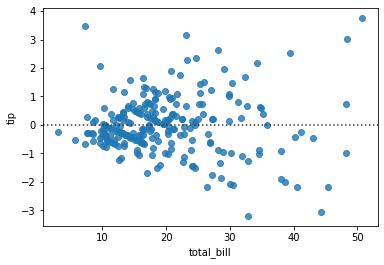

In [20]:
plot_residuals(x, y)

5. Write a function, regression_errors(y, yhat), that takes in y and yhat and returns: 

    -(SSE)the sum of squared errors or (RSS)the residual sum of squares
        -This is a good metric to use if outliers matter
        -Square each residual value (yhat - y.mean()) and sum across all observations
        -sklearn.metrics.mean_squared_error() can help us compute this compute this
            -MSE * n = SSE
                -sklearn.metrics.mean_squared_error(y, yhat) * len(df) = SSE
                
    -(ESS)explained sum of squares
        -The difference between the PREDICTED tip and the mean of all tips
            -the difference between the phat and the mean of all y
            
    -(TSS)total sum of squares
        -The difference between the ACTUAL tip and the mean of all tips
        -This is the total of ESS and SSE
        
    -(MSE)mean squared error
        -This is a good metric to use if outliers don't matter so much
        -A residual of 10 is greater than twice a residual of 5
        -sklearn.metrics.mean_squared_error(y, yhat) can compute this
        -SSE / len(df) = MSE
        
    -(RMSE)root mean squared error
        -This is a good metric to use if you want to see the error in the actual units of the y variable
        -from math import sqrt
        -sqrt(MSE) = RMSE

In [37]:
# regression_errors(y, yhat)
def regression_errors(y, yhat):
    """
    Takes: 
          target variable y, Pandas Series
          yhat, calculated regression Pandas Series
    Returns:
          SSE, ESS, TSS, MSE, RMSE
    """
    from math import sqrt
    SSE = ((yhat - y) ** 2).sum()
    MSE = SSE / len(y)
    ESS = sum((yhat - y.mean())**2)
    TSS = SSE + ESS
    RMSE = sqrt(MSE)
    return SSE, ESS, TSS, MSE, RMSE

In [38]:
# Test regression_errors func
SSE, ESS, TSS, MSE, RMSE = regression_errors(y, yhat)
print(SSE)
print(ESS)
print(TSS)
print(MSE)
print(RMSE)

252.788743850776
212.4237331984042
465.21247704918017
1.036019442011377
1.0178504025697377


6. Write a function, baseline_mean_errors(y), that takes in your target, y, computes the SSE, MSE & RMSE when yhat is equal to the mean of all y, and returns the error values (SSE, MSE, and RMSE).

In [35]:
# baseline_mean_errors(y)
def baseline_mean_errors(y):
    """
    Takes: 
          target variable y, Pandas Series
    Returns:
          SSE, MSE, RMSE for baseline values
    """
    from math import sqrt
    bSSE = ((y.mean() - y) ** 2).sum()
    bMSE = bSSE / len(y)
    bRMSE = sqrt(bMSE)
    return bSSE, bMSE, bRMSE

In [36]:
bSSE, bMSE, bRMSE = baseline_mean_errors(y)
print(f"bSSE = {bSSE}")
print(f"bMSE = {bMSE}")
print(f"bRMSE = {bRMSE}")
    

bSSE = 465.2124770491804
bMSE = 1.906608512496641
bRMSE = 1.3807999538298954


7. Write a function, better_than_baseline(SSE), that returns true if your model performs better than the baseline, otherwise false.



In [39]:
# better_than_baseline(SSE)
def better_than_baseline(y, yhat):
    """
    Takes: 
          y variable, Pandas Series
          yhat variable, Pandas Series
    Returns:
          boolean value evaluating statement
              - model performs better
              than baseline
    """
    SSE = ((yhat - y) ** 2).sum()
    bSSE = ((y.mean() - y) ** 2).sum()
    return SSE < bSSE

In [41]:
better_than_baseline(y, yhat)

True

8. Write a function, model_significance(ols_model), that takes the ols model as input and returns the amount of variance explained in your model, and the value telling you whether the correlation between the model and the tip value are statistically significant.